## Problem Statement

Analyze the IPL data and find the conclusion about "Is Dhoni Capable enough to bat?"

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')

In [3]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(200663, 22)

In [6]:
df.innings.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [7]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [8]:
df.innings.unique()

array([1, 2], dtype=int64)

In [9]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [11]:
len(df[df['striker'] == "MS Dhoni"])

3525

In [12]:
dhoni_df = (df[df['striker'] == "MS Dhoni"])

In [13]:
dhoni_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.start_date.unique()

array(['2008-04-18', '2008-04-19', '2008-04-20', '2008-04-21',
       '2008-04-22', '2008-04-23', '2008-04-24', '2008-04-25',
       '2008-04-26', '2008-04-27', '2008-04-28', '2008-04-29',
       '2008-04-30', '2008-05-01', '2008-05-02', '2008-05-03',
       '2008-05-04', '2008-05-05', '2008-05-06', '2008-05-07',
       '2008-05-08', '2008-05-09', '2008-05-10', '2008-05-11',
       '2008-05-12', '2008-05-13', '2008-05-14', '2008-05-15',
       '2008-05-16', '2008-05-17', '2008-05-18', '2008-05-19',
       '2008-05-20', '2008-05-21', '2008-05-23', '2008-05-24',
       '2008-05-25', '2008-05-26', '2008-05-27', '2008-05-28',
       '2008-05-30', '2008-05-31', '2008-06-01', '2009-04-18',
       '2009-04-19', '2009-04-20', '2009-04-21', '2009-04-22',
       '2009-04-23', '2009-04-24', '2009-04-25', '2009-04-26',
       '2009-04-27', '2009-04-28', '2009-04-29', '2009-04-30',
       '2009-05-01', '2009-05-02', '2009-05-03', '2009-05-04',
       '2009-05-05', '2009-05-06', '2009-05-07', '2009-

In [17]:
# convert to datetime
dhoni_df['start_date'] = pd.to_datetime(dhoni_df['start_date']) 

In [18]:
dhoni_df['year'] = dhoni_df['start_date'].dt.year

In [19]:
dhoni_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1817,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [20]:
dhoni_df = dhoni_df[(dhoni_df.year >= 2018) & (dhoni_df.year <= 2021)]

In [21]:
dhoni_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150470,1136561,2018,2018-04-07,Wankhede Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150473,1136561,2018,2018-04-07,Wankhede Stadium,2,7.7,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150474,1136561,2018,2018-04-07,Wankhede Stadium,2,8.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150476,1136561,2018,2018-04-07,Wankhede Stadium,2,8.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2018
150485,1136561,2018,2018-04-07,Wankhede Stadium,2,7.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [22]:
# No of Runs scored by Dhoni from 2018-2021
sum(dhoni_df.runs_off_bat)

1108

In [23]:
#No of Balls Faced by dhoni
len(dhoni_df)

845

In [25]:
#Strike Rate of Dhoni
100*sum(dhoni_df.runs_off_bat)/len(dhoni_df)

131.12426035502958

## Observation

from above code it is seen that Dhoni has a good strike rate from ear 2018 to 2021, which means he has a better form 

In [26]:
# runs scored by Dhoni in front of this bowler
ddf1 = pd.DataFrame(dhoni_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [27]:
#balls faced by Dhoni in front of this bowler
ddf2 = pd.DataFrame(dhoni_df.groupby('bowler')['ball'].count()).reset_index()

In [28]:
ddf3 = ddf1.merge(ddf2, on = 'bowler', how = 'left')

In [29]:
ddf3.head()

,bowler,runs_off_bat,ball
0,A Mishra,26,19
1,A Nortje,5,6
2,AD Russell,0,2
3,AJ Tye,37,23
4,AR Patel,7,19


In [30]:
ddf3['strike_rate'] = 100*ddf3.runs_off_bat/ddf3.ball

In [31]:
ddf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Mishra,26,19,136.842105
1,A Nortje,5,6,83.333333
2,AD Russell,0,2,0.000000
3,AJ Tye,37,23,160.869565
4,AR Patel,7,19,36.842105


In [32]:
ddf3 = ddf3[ddf3.ball >= 10]

In [33]:
ddf3.shape

(34, 4)

In [35]:
ddf3.reset_index(inplace = True, drop = True)

In [36]:
#sorting values according to strike rate for Dhoni
ddf3.sort_values('strike_rate',ascending=False)

,bowler,runs_off_bat,ball,strike_rate
17,MM Sharma,34,14,242.857143
7,CJ Anderson,24,10,240.000000
31,TA Boult,65,28,232.142857
32,TK Curran,25,11,227.272727
21,P Negi,25,12,208.333333
6,CH Morris,34,17,200.000000
10,JD Unadkat,51,27,188.888889
15,Kuldeep Yadav,36,20,180.000000
29,SM Curran,25,14,178.571429
28,S Kaul,25,14,178.571429


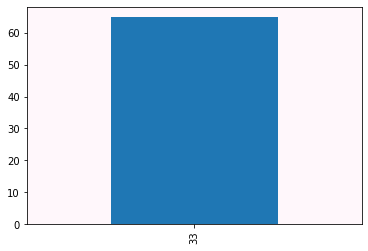

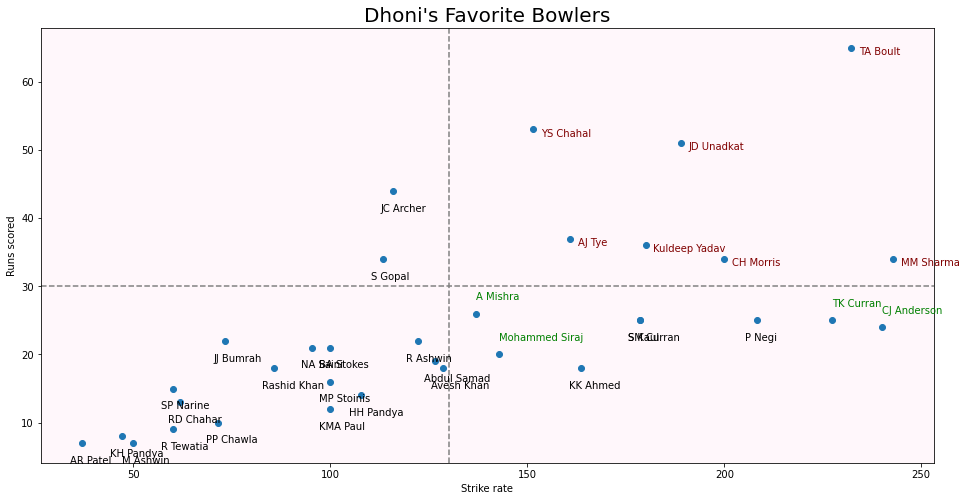

In [43]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(ddf3.strike_rate, ddf3.runs_off_bat)

for i in range(len(ddf3)):
    if (ddf3.bowler[i] == 'TA Boult') | (ddf3.bowler[i] == 'YS Chahal') | (ddf3.bowler[i] == 'JD Unadkat') | (ddf3.bowler[i] == 'Kuldeep Yadav')| (ddf3.bowler[i] == 'CH Morris')| (ddf3.bowler[i] == 'AJ Tye')| (ddf3.bowler[i] == 'MM Sharma'):
        plt.text(ddf3.strike_rate[i] + 2, ddf3.runs_off_bat[i] - 1, ddf3.bowler[i], color = 'maroon')
    elif (ddf3.bowler[i] == 'CJ Anderson') | (ddf3.bowler[i] == 'TK Curran')| (ddf3.bowler[i] == 'A Mishra')| (ddf3.bowler[i] == 'Mohammed Siraj'):
        plt.text(ddf3.strike_rate[i], ddf3.runs_off_bat[i] + 2, ddf3.bowler[i], color = "green")    
    else:
        plt.text(ddf3.strike_rate[i] - 3, ddf3.runs_off_bat[i] - 3, ddf3.bowler[i])
    
#     if adf3.bowler[i] == 'JJ Bumrah':
#         plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
#     elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
#         plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
#     elif (adf3.bowler[i] == 'HH Pandya'):
#         plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 2, adf3.bowler[i])
#     elif (adf3.bowler[i] == 'AD Russell'):
#         plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])

plt.axvline(130, ls = '--', color = 'grey')
plt.axhline(30, ls = '--', color = 'grey')
plt.title("Dhoni's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
# plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()

## Observation

1. Accourding to graph above MS Dhoni has high strike rate against many of the finest death bowlers such as Trent Boult, Mohit Sharma, CH Morris,Aj Tye, JD Unadkat etx

2. Accourding to graph above Ms Dhoni has good strike rate against corey Anderson ,Tom currun ,siraj  and mishra .

3. Accourding to graph above MS Dhoni has low strike rate against key death bolwers of 2021 years such as jasprit Bumrah , Acesh Khan, Rashid Khan,Archer, SP Narine.

In [44]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [45]:
CSk_df = (df[df['batting_team'] == "Chennai Super Kings"])

In [62]:
CSk_df =CSk_df[(CSk_df.year >= 2018) & (CSk_df.year <= 2021)]

In [63]:
CSk_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150459,1136561,2018,2018-04-07,Wankhede Stadium,2,7.3,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150460,1136561,2018,2018-04-07,Wankhede Stadium,2,7.2,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150461,1136561,2018,2018-04-07,Wankhede Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150462,1136561,2018,2018-04-07,Wankhede Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150463,1136561,2018,2018-04-07,Wankhede Stadium,2,6.5,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [72]:
# No of Runs scored by CSK from 2014-2017
sum(CSk_df_2014_2017.runs_off_bat)

0

In [66]:
# No of Runs scored by CSK from 2018-2021
sum(CSk_df.runs_off_bat)

8361

In [67]:
#Runs scored by dhoni for CSk from 2018 to 2021
sum(dhoni_df.runs_off_bat)

1108

In [68]:
# Team Contribution of MS Dhoni for CSK 
100*sum(dhoni_df.runs_off_bat)/sum(CSk_df.runs_off_bat)

13.252003348881713

## Observation

From above code it is clear that Ms Dhoni's COntribution in  Csk's score is 13.25% only which is average. 

## Conclusion

1.My conclusion to this case study is that MS dhoni is one of the best batsmen for csk but , from year 2018 to 2021 he is not played very well according to his skills.

2.He has good strike rate against many specialist death bowlers but runs scored for the team are less.

3. Ms Dhoni's team contribution is just 13.25% which is average.


So my conclusion is he is still a good batsman that can take over bowlers.